### ML Steps
1) Dataset Review
2) Model Selection - KNN Algoritması
3) Training The Model
4) Evaluation of Results - Sonuçların Değerlendirilmesi
5) Hyperparameter Tuning

### Dataset Review
Scikit-learn (sklearn) kütüphanesinde bulunan hazır bir veri seti kullanacağız. Bu adımda veri seti incelenir. Buna literatürde EDA denir. Detaylı olarak daha sonra bakılması gerekiyor!

In [93]:
from matplotlib.lines import lineStyles
from sklearn.datasets import load_breast_cancer # Binary classification problem dataset
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

cancer_data = load_breast_cancer() # Fonksiyon dökümantasyonda yazan herşeyi return eder.

breast_cancer_df = pd.DataFrame(load_breast_cancer(as_frame=True).frame) # Frame olarak tüm özellikleri tekte alabiliyoruz.

print(f"Shape: {breast_cancer_df.shape}")
breast_cancer_df

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### ML Algoritma Seçimi
Normalde EDA analizi sonucu deneyimlerimize dayalı olarak algoritma seçimi yaparız. Ancak eğitim kapsamında K-NN'den devam edeceğiz.

K-NN algoritması verileri komşularına göre sınıflandırdığı için feature'ları normalize etmek önemlidir.

### Modelin Train Edilmesi
Sklearn kütüphanesini kullanarak modelimizi train edeceğiz. Sklearn kütüphanesinde tüm algoritmalarda training aşaması .fit() algoritması ile gerçekleştirilir.

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors=9) # K (komşu) parametresini unutma! Default olarak = 3'tür...

# Train - Test Split
# 4 tane array return eder => (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3, random_state=42) # Not: Random state doğruluğu etkiliyor. Bunu bir araştır.

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

# Ölçeklendirme - Preprocess
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #Eğitim ve transfomr işlemi yapar.
X_test = scaler.transform(X_test)


# Not feature_names'lerin verilmesine gerek yoktur.
# X => train edilecek verinin feature değerleri için kullanılır. y ise target'dır.
knn.fit(X=X_train,y=y_train) # .fit() fonksiyonu verdiğimiz veriye ve target'lara (samples + targets) göre knn algoritmasını eğitir.

X_train: (398, 30), y_train: (398,), X_test: (171, 30), y_test: (171,)


KNeighborsClassifier(n_neighbors=9)

In [95]:
X_train

array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Modelimizi eğittikten sonra artık tahmin aşamasına geçebiliriz.
y_pred = knn.predict(X=X_test) # Normalde burada eğitim verisinde kullandığımız verileri tekrardan vermeyiz. Bu yanlıştır. Şimdilik kolay olması açısından bu şekilde yapıyoruz.

# Şimdi sonuçları karşılaştıralım - Accuracy score fonkisyonunu kullanabiliriz. Bu fonksiyon parametre olarak hem doğru sonuçları hem de tahmin sonuçlarını alarak bir karşılaştırma yapar.
score = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f"Doğruluk: {score}")

conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
conf_matrix

Doğruluk: 0.9707602339181286


array([[ 60,   3],
       [  2, 106]], dtype=int64)

### Hyperparameter Optimizasyonu

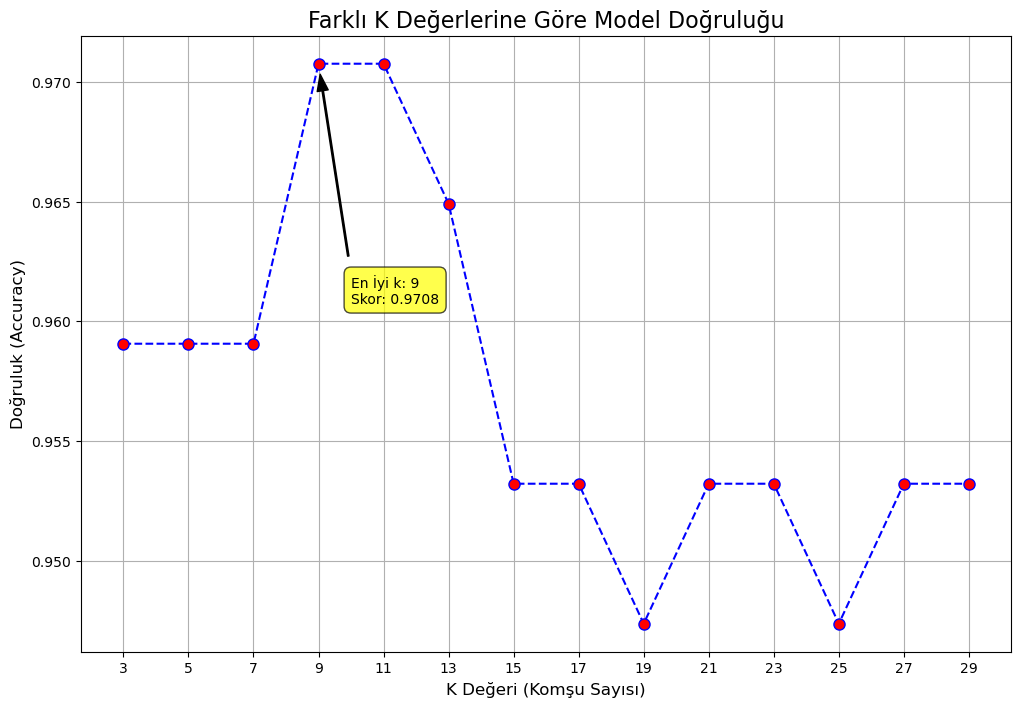

In [109]:
import matplotlib.pyplot as plt
import numpy as np

scores = []
k_values = range(3, 30, 2)
for k in k_values:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)

    y_pred = knn_.predict(X=X_test)
    score = accuracy_score(y_pred=y_pred, y_true=y_test)
    scores.append(score)

plt.figure(figsize=(12, 8))
plt.plot(k_values, scores, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=8)

# En iyi skoru ve karşılık gelen k değerini bulma
best_score_index = np.argmax(scores)
best_k = k_values[best_score_index]
best_accuracy = scores[best_score_index]

# En iyi skoru grafikte işaretleme
plt.annotate(
    f'En İyi k: {best_k}\nSkor: {best_accuracy:.4f}',
    xy=(best_k, best_accuracy),
    xytext=(best_k + 1, best_accuracy - 0.01), # Metnin konumu
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    bbox=dict(boxstyle="round,pad=0.5", fc="yellow", ec="k", lw=1, alpha=0.7)
)

# Eksenleri ve başlığı isimlendirme
plt.title('Farklı K Değerlerine Göre Model Doğruluğu', fontsize=16)
plt.xlabel('K Değeri (Komşu Sayısı)', fontsize=12)
plt.ylabel('Doğruluk (Accuracy)', fontsize=12)

# Eksenlerin başlangıç ve bitiş değerlerini ayarlama
plt.xticks(k_values)
plt.grid(True) # Izgara ekleme
plt.show() # Grafiği gösterme
